<a href="https://colab.research.google.com/github/Aaaaaamz/google-app-rating/blob/main/playstore_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAJOR PROJECT 2**

**Importing required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

Importing the give data in data frame

In [4]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking duplicate data

In [7]:
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df_no_dup = df.drop(df.index[df.App.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(df_no_dup.shape[0]))

There are 1181/10841 duplicated records.
9660 records after dropping duplicated.


Cleaning type values

In [8]:
print(set(df_no_dup.Type))
print("Dropping alien Type value '0', {} record(s) removed".format(sum(df_no_dup.Type == '0')))
df_no_dup = df_no_dup.drop(df_no_dup.index[df_no_dup.Type == '0'], axis=0)

{nan, '0', 'Paid', 'Free'}
Dropping alien Type value '0', 1 record(s) removed


checking and droping null values

In [25]:
print("NaA value statistics in each column")
print(df_no_dup.isnull().sum(axis=0),'\n')
df_no_dup = df_no_dup.dropna(subset=['Type'])
print("Column 'Type' with NaN values are dropped, {} records left.".format(df_no_dup.shape[0]))

NaA value statistics in each column
App                  0
Category             0
Rating            1462
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64 

Column 'Type' with NaN values are dropped, 9658 records left.


makinng rating dataframe

In [23]:
df_rating = df_no_dup.dropna(subset=['Rating'])
print("Cleaned dataframe for 'Rating' has {} records.".format(df_rating.shape[0]))

Cleaned dataframe for 'Rating' has 8196 records.


here i am analysing rating,paidfree,type so only adding them in dataframe

In [26]:
df_rating = df_rating.loc[:,['Rating', 'Type', 'Category']]

Definig histogram

In [27]:
def plot_hist(df, col, bins=10):
    """
    Plot histograms for a column
    """
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.title('Distribution of {}'.format(col))

arranging no of paid and free apps

In [28]:
def compute_app_types(df):
    
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

adding the h paod free app values to axis of graphs

In [29]:
def plot_app_types(df):
    
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)


plotting graph

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


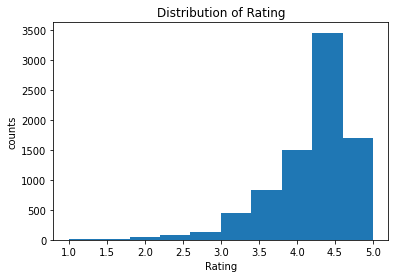

In [30]:
plot_hist(df_rating, 'Rating')
df_rating.describe()

In [13]:
print("There are {} free and {} paid apps in the the Rating dataframe ".format(*compute_app_types(df_rating)))

There are 7592 free and 604 paid apps in the the Rating dataframe 


Rating distribution of paid and free apps

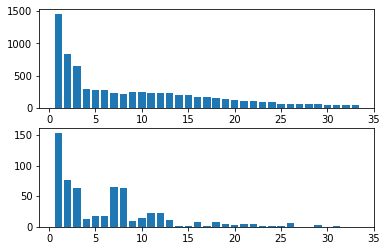

In [14]:

plot_app_types(df_rating)

In [16]:
df_rating.describe()

,Rating
count,5753.000000
mean,4.173197
std,0.544844
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


plotting the average rating of paid and free apps

Free app has average Rating 4.1663724973656535
Paid app has average Rating 4.259602649006619
Mean rating: 4.173243045387998


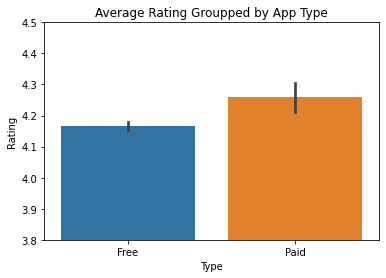

In [31]:
def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))    
    return stats
    
stats = plot_target_by_group(df_rating, 'Rating', 'Type', title="Average Rating Groupped by App Type")
for i, s in zip(stats.index, stats):
    print("{} app has average {} {}".format(i, 'Rating',s))
mean_rating = df_rating.Rating.mean()
print("Mean rating: {}".format(mean_rating))

plotting the difference between rating of paid and free apps

Category
COMMUNICATION        -0.063287
FAMILY                0.115128
FINANCE              -0.297604
GAME                  0.136364
HEALTH_AND_FITNESS    0.154858
LIFESTYLE             0.166608
MEDICAL               0.087344
PERSONALIZATION       0.147692
PHOTOGRAPHY          -0.152796
PRODUCTIVITY          0.023577
SPORTS                0.041940
TOOLS                 0.142818
Name: Rating, dtype: float64

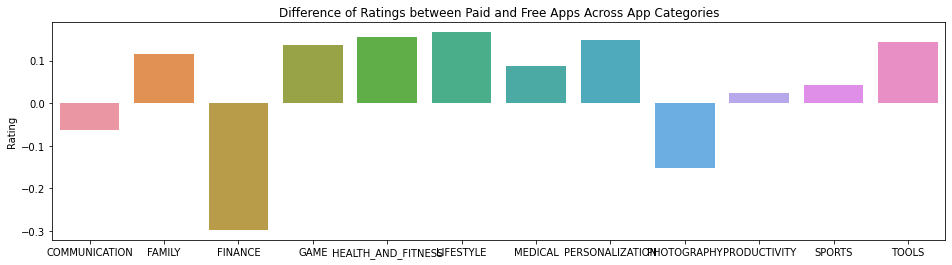

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
sns.barplot(x=sorted_idx, y=rating_diff, ax=ax).set_title("Difference of Ratings between Paid and Free Apps Across App Categories");
rating_diff